In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df =  pd.read_csv(r'..\JNB_data\HR_data.csv')

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [29]:
# here mean and 50% (aka median) are closer which means less outliers for each columns

In [10]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## factors on which people leave the organization ?

In [14]:
df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [15]:
left_org = df[df.left == 1]

In [16]:
stay_org = df[df.left == 0]

In [17]:
stay_org['promotion_last_5years'].value_counts()

promotion_last_5years
0    11128
1      300
Name: count, dtype: int64

In [18]:
left_org['promotion_last_5years'].value_counts()

promotion_last_5years
0    3552
1      19
Name: count, dtype: int64

In [19]:
#'promotion_last_5years' cannot be used to decide whether the person stay or leave from the organization

In [37]:
df.left.unique()

array([1, 0], dtype=int64)

<Axes: xlabel='Count', ylabel='satisfaction_level'>

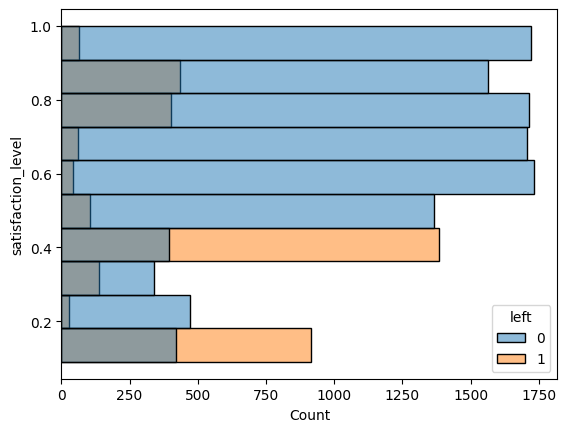

In [45]:
sns.histplot(data = df, y= 'satisfaction_level', bins= 10, edgecolor='black', hue='left')

<Axes: xlabel='Count', ylabel='satisfaction_level'>

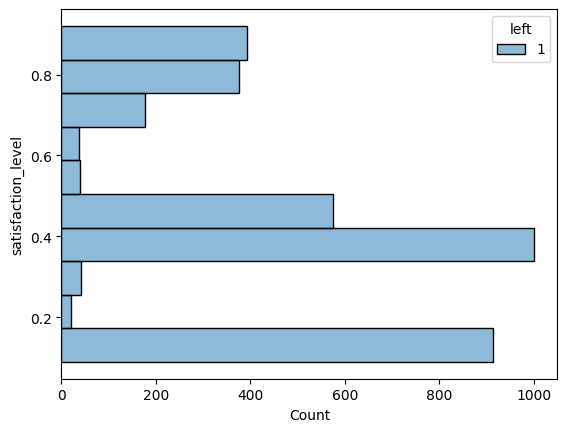

In [46]:
sns.histplot(data = left_org, y= 'satisfaction_level', bins= 10, edgecolor='black', hue='left')

<Axes: xlabel='Count', ylabel='satisfaction_level'>

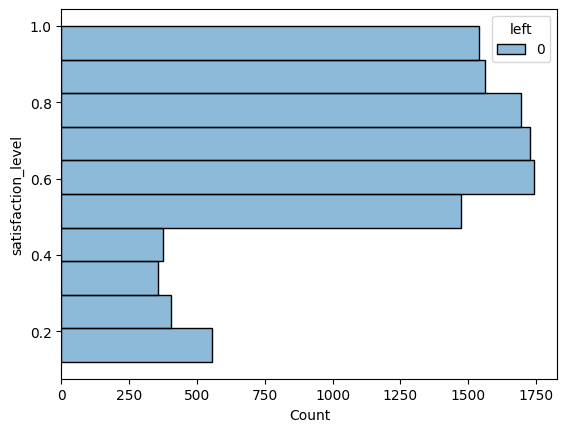

In [47]:
sns.histplot(data = stay_org, y= 'satisfaction_level', bins= 10, edgecolor='black', hue='left')

<Axes: ylabel='salary'>

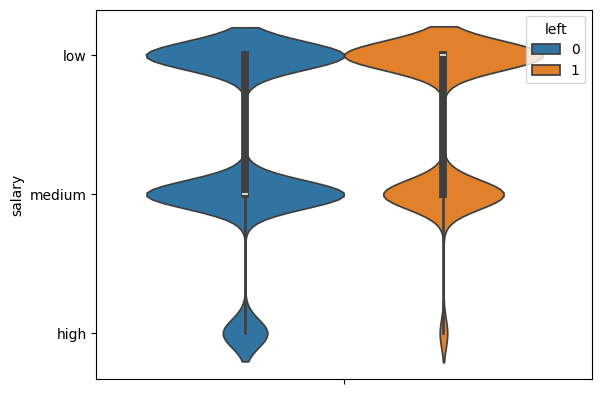

In [34]:
sns.violinplot(data = df, y= df['salary'], hue=df['left'])

<Axes: xlabel='satisfaction_level', ylabel='Count'>

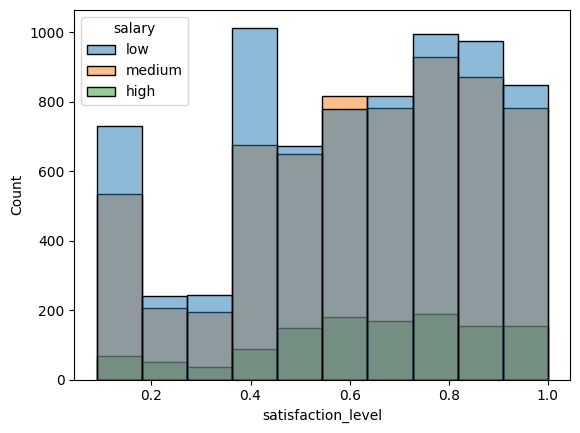

In [24]:
# import matplotlib.ticker as ticker
# fig, ax = plt.subplots()
# ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(df[['salary','satisfaction_level']])))
sns.histplot(data = df, x= df['satisfaction_level'], bins=10, edgecolor='black', hue=df['salary'])

<Axes: xlabel='satisfaction_level', ylabel='Count'>

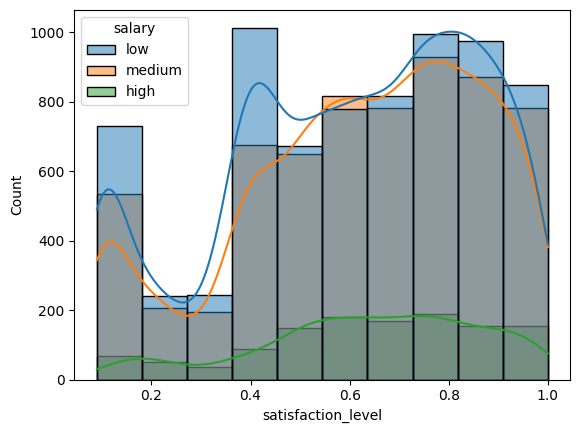

In [53]:
sns.histplot(data=df, x=df['satisfaction_level'], kde=True, bins= 10, hue=df['salary'])

In [36]:
left_org['satisfaction_level'].value_counts()

satisfaction_level
0.10    358
0.11    335
0.09    195
0.37    194
0.43    178
       ... 
0.65      1
0.68      1
0.67      1
0.22      1
0.26      1
Name: count, Length: 81, dtype: int64

In [25]:
left_org[(left_org['satisfaction_level'] < 0.5) | (left_org['salary'] == 'low')]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
import matplotlib.pyplot as plt

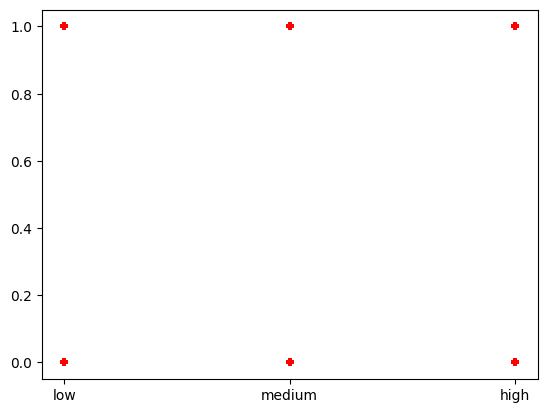

In [8]:
plt.scatter(df.salary,df.left,marker='+',color='red')